# Aprendendo Matplotlib com Rougier

## Gráficos Simples

Veremos como criar gráficos que ilustram as funções seno e cosseno. O primeiro passo consiste em obter os dados necessários para o desenho.


In [ ]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)

A variável `x`, a partir do comando `np.linspace()`, se torna um _array_ e recebe 256 valores entre -π e π (inclusive).

Dito isto, vamos completar o código para mostrarmos o gráfico:

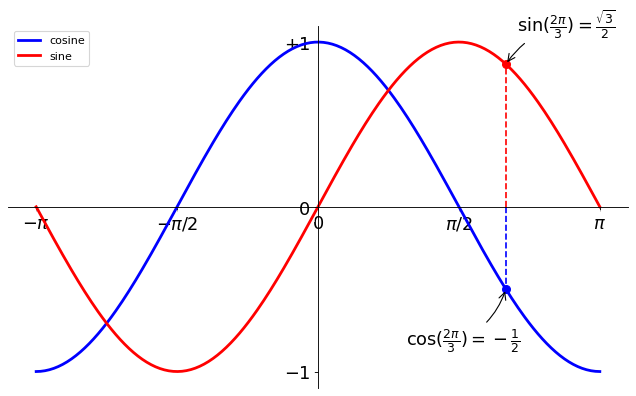

In [ ]:
# Importações
import numpy as np
import matplotlib.pyplot as plt

# Crio um array de valores que partem de -pi até +pi
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)

# Criação de uma figura de proporção 10x6 pontos
fig, ax = plt.subplots(figsize=(10,6), dpi=80)

# Modificando a coloração das curvas, bem como sua espessura (1 pixel) e forma
ax.plot(x, c, color="blue", linewidth=2.5, linestyle="-", label='cosine')
ax.plot(x, s, color="red", linewidth=2.5, linestyle="-", label='sine')

# Posicionamento da legenda
ax.legend(loc='upper left', frameon=True)

# Atribuindo um limite numérico ao eixo x
ax.set_xlim(x.min()*1.1, x.max()*1.1)
ax.set_xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r"$-\pi$", r"$-\pi/2$", r"0", r"$\pi/2$", r"$\pi$"]
)  # Quantidade de valores no eixo X, com representações "textuais"

# Atribuindo um limite numérico ao eixo y
ax.set_ylim(c.min()*1.1, c.max()*1.1)
ax.set_yticks(
    [-1.0, 0, 1.0],
    [r"$-1$", r"$0$", r"$+1$"]
)  # Quantidade de valores apresentados em Y, cada qual com uma representação

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

t = 2*np.pi/3
ax.plot([t, t], [0, np.cos(t)], color='blue', linewidth=1.5, linestyle='--')
ax.scatter([t,], [np.cos(t),], 50, color='blue')

ax.annotate(
    r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
    xy=(t, np.cos(t)), xycoords='data',
    xytext=(-90, -50), textcoords='offset points', fontsize=16,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),

)

ax.plot([t, t], [0, np.sin(t)], color='red', linewidth=1.5, linestyle='--')
ax.scatter([t,], [np.sin(t),], 50, color='red')

ax.annotate(
    r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
    xy = (t, np.sin(t)), xycoords = 'data',
    xytext = (+10, +30), textcoords='offset points', fontsize = 16,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2")
)

for label in ax.get_xticklabels() + ax.get_yticklabels():
  label.set_fontsize(16)
  label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))


# Mostra o gráfico
plt.show()

## Figures, Subplots, Axes e Ticks

Uma figure em Matplotlib consiste em toda interface do usuário. Enquanto um subplot posiciona gráficos em uma grade (matriz), os eixos (axes, sendo axis o modo singular) permitem uma colocação livre destas linhas ao longo da figura.

### Figures

Argumentos | Default | Descrição
-|-|-
num | 1 |número da figura
figsize | figure.figsize | tamanho da figura em polegadas (height e width)
dpi | figure.dpi | resolução em pontos por polegada
facecolor | figure.facecolor | cor de fundo do desenho
edgecolor | figure.edgecolor | cor da borda do desenho
frameon | True | desenha um quadro (frame) ou não

### Subplots

Com um subplot é possível organizar gráficos em matrizes. Você só precisa especificar o número de linhas e colunas e o número de gráficos. Desde já, tenha noção de que o comando [`gridspec`](https://matplotlib.org/2.0.2/users/gridspec.html) é uma opção mais poderosa. Curiosamente, `gridspec` possui um sistema de numeração igual ao python, em que o início de uma sequência é marcado pelo número 0.

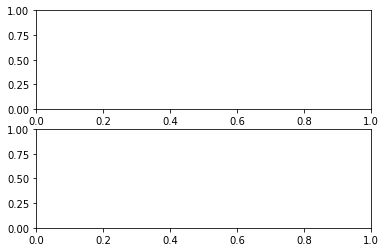

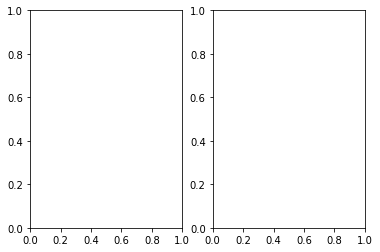

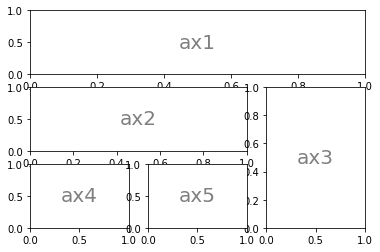

In [ ]:
import matplotlib.pyplot as plt

# Gera subplots (2, 1, 1) e (2, 1, 2)
fig, axs = plt.subplots(2, 1)


# Gera subplots (1, 2, 1) e (1, 2, 2)
fig, axs = plt.subplots(1, 2)

# Gera subplots (2, 2, 1), (2, 2, 2), ..., (2, 2, 4)
fig, axs = plt.subplots(2, 2)

# Exemplo de uso do gridspec
# subplot2grid((dimensões da matriz), (posição do gráfico na matriz))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
text(0.5, 0.5, 'ax1', ha='center', va='center', size=20, alpha=.5)

ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
text(0.5, 0.5, 'ax2', ha='center', va='center',size=20, alpha=.5)

ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
text(0.5, 0.5, 'ax3', ha='center', va='center', size=20, alpha=.5)

ax4 = plt.subplot2grid((3, 3), (2, 0))
text(0.5, 0.5, 'ax4', ha='center', va='center', size=20, alpha=.5)

ax5 = plt.subplot2grid((3, 3), (2, 1))
text(0.5, 0.5, 'ax5', ha='center', va='center', size=20, alpha=.5)

# Mostra os resultados
plt.show()

### Axes

Axes (ou eixos) são bem similares aos subplots, mas permitem o posicionamento dos elementos em qualquer local de uma figure. Caso for a intenção do programador inserir um eixo dentro de outro, ele se utilizaria deste artifício.

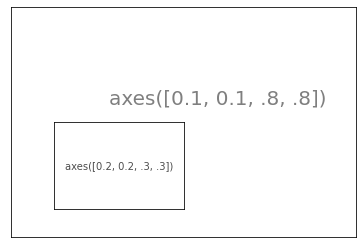

In [ ]:
import matplotlib.pyplot as plt

eixo1 = plt.axes([0.1, 0.1, .8, .8])
plt.xticks([])
plt.yticks([])
plt.text(
    0.6, 0.6, 'axes([0.1, 0.1, .8, .8])',
    ha='center', va='center', size=20, alpha=.5
)


plt.axes([0.2, 0.2, .3, .3])
plt.xticks([])
plt.yticks([])
plt.text(
    0.5, 0.5, 'axes([0.2, 0.2, .3, .3])',
     ha='center', va='center', size=10, alpha=.7
)


plt.show()


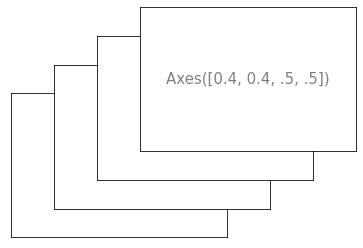

In [ ]:
from pylab import *

axes([0.1, 0.1, .5, .5])
xticks([]), yticks([])

axes([0.2, 0.2, .5, .5])
xticks([]), yticks([])

axes([0.3, 0.3, .5, .5])
xticks([]), yticks([])

axes([0.4, 0.4, 0.5, 0.5])
xticks([]), yticks([])
text(
    0.5, 0.5, 'Axes([0.4, 0.4, .5, .5])',
    ha='center', va='center', size=15, alpha=.5
)

show()